### Natural Language Processing

NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language.

##### (Natural Language Toolkit)NLTK 
NLTK is a popular open-source package in Python. Rather than building all tools from scratch, NLTK provides all common NLP Tasks.

##### Installing NLTK

In [3]:
!pip install nltk

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import nltk

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Reading and Exploring Dataset

In [6]:
# Read raw data
rawData = open("SMSSpamCollection.csv").read()

In [7]:
# Print raw data
rawData[0:250]

'ï»¿ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."\nham,Ok lar... Joking wif u oni...\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to re'

In [9]:
import pandas as pd
data = pd.read_table('SMSSpamCollection', 
                   sep='\t', 
                   header=None, 
                   names=['label', 'body_text'])

print('No.of rows:', data.shape[0])
print('No.of columns:', data.shape)
data.head()

No.of rows: 5572
No.of columns: (5572, 2)


,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Pre-processing Data

Cleaning (or pre-processing) the data typically consists of a number of steps:

#### 1. Remove punctuation

Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters. 

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


##### 2. Tokenization

Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text.

In [12]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


##### 3. Remove stopwords

Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them.

In [13]:
import nltk

stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [14]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

data['body_text_nostopwords'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostopwords
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


### Preprocessing Data: Stemming

Stemming helps reduce a word to its stem form. It often makes sense to treat related words in the same way. It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. It reduces the corpus of words but often the actual words get neglected.

In [16]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostopwords'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostopwords,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


### Preprocessing Data: Lemmatizing

Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.eg: Entitling, Entitled->Entitle

In Short, Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind.

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Nirmala
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk import WordNetLemmatizer

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostopwords'].apply(lambda x: lemmatizing(x))

data.head(5)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostopwords,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"


### Saving the cleaned Data

In [19]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.

data.to_csv("SMSSpamCollection_cleaned.csv", sep=',')

### Vectorizing Data

Vectorizing is the process of encoding text as integers i.e. numeric form to create feature vectors so that machine learning algorithms can understand our data.

### Vectorizing Data: Bag-Of-Words

Bag of Words (BoW) or CountVectorizer describes the presence of words within the text data. It gives a result of 1 if present in the sentence and 0 if not present. It, therefore, creates a bag of words with a document-matrix count in each text document.

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() #

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))


#Function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(5572, 8109)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

BOW is applied on the body_text, so the count of each word is stored in the document matrix. 

In [22]:
X_counts

<5572x8109 sparse matrix of type '<class 'numpy.int64'>'
	with 50185 stored elements in Compressed Sparse Row format>

In [23]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Data: N-Grams

***N-grams*** are simply all combinations of adjacent words or letters of length n that we can find in our source text. Ngrams with n=1 are called unigrams. Similarly, bigrams (n=2), trigrams (n=3) and so on can also be used.

Unigrams usually don’t contain much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the letter or word is likely to follow the given word. The longer the n-gram (higher n), the more context you have to work with.

##### Apply CountVectorizer (N-Grams)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5572, 8109)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

N-Gram is applied on the body_text, so the count of each group words in a sentence word is stored in the document matrix. 

In [25]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Data: TF-IDF

Used for search engine scoring, text summarization, document clustering.

*** The TF (term frequency) of a word is the frequency of a word (i.e. number of times it appears) in a document. When you know it, you’re able to see if you’re using a term too much or too little.***

For example, when a 100 word document contains the term “cat” 12 times, the TF for the word ‘cat’ is

TFcat = 12/100 i.e. 0.12

***The IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus.***

For example, say the term “cat” appears x amount of times in a 10,000,000 million document-sized corpus (i.e. web). Let’s assume there are 0.3 million documents that contain the term “cat”, then the IDF (i.e. log {DF}) is given by the total number of documents (10,000,000) divided by the number of documents containing the term “cat” (300,000).

IDF (cat) = log (10,000,000/300,000) = 1.52

∴ Wcat = (TF*IDF) cat = 0.12 * 1.52 = 0.182

***TF*IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.***

***Put simply, the higher the TF*IDF score (weight), the rarer the term and vice versa.***

The TF*IDF algorithm is used to weigh a keyword in any content and assign the importance to that keyword based on the number of times it appears in the document. More importantly, it checks how relevant the keyword is throughout the web, which is referred to as corpus.

For a term t in a document d, the weight Wt,d of term t in document d is given by:

Wt,d = TFt,d log (N/DFt)

Where:

TFt,d is the number of occurrences of t in document d.
DFt is the number of documents containing the term t.
N is the total number of documents in the corpus.

##### Apply TfidfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 8109)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

TF-IDF is applied on the body_text, so the relative count of each word in the sentences is stored in the document matrix. 

***Note***: Vectorizers outputs sparse matrices. Sparse Matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [27]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

                  0  008704050406  0089mi  0121  01223585236  01223585334  \
0     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
1     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
2     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
3     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
4     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
5     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
6     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
7     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
8     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
9     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
10    0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
11    0.000000  0.0           0.0     0.0   0.0          0.0          0.0   

### Feature Engineering: Feature Creation

***Feature engineering*** is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is like an art as it requires domain knowledge and it can tough to create features, but it can be fruitful for ML algorithm to predict results as they can be related to the prediction.

In [29]:
import pandas as pd

data = pd.read_table('SMSSpamCollection', 
                   sep='\t', 
                   header=None, 
                   names=['label', 'body_text'])

##### Create feature for text message length and % of punctuation in text

In [30]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


* ***body_len*** shows the length of words excluding whitespaces in a message body.

* ***punct%*** shows the percentage of punctuation marks in a message body.

##### Check If Features are good or not

In [31]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


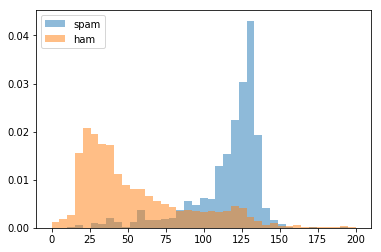

In [32]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
plt.legend(loc='upper left')
plt.show()

#### We can clearly see that Spams have a high number of words as compared to Hams. So it’s a good feature to distinguish.

C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


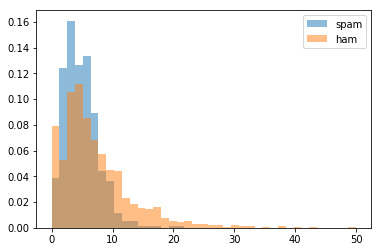

In [33]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
plt.legend(loc='upper right')
plt.show()

#### Spam has a percentage of punctuations but not that far away from Ham. Surprising as at times spam emails can contain a lot of punctuation marks. But still, it can be identified as a good feature.

### Building ML Classifiers: Model selection

We use an ***ensemble method*** of machine learning where multiple models are used and their combination produces better results than a single model(Support Vector Machine/Naive Bayes). Ensemble methods are the first choice for many Kaggle Competitions. ***Random Forest*** i.e multiple random decision trees are constructed and the aggregates of each tree are used for the final prediction. It can be used for classification as well as regression problems. It follows a bagging strategy.

***Grid-search:*** It exhaustively searches overall parameter combinations in a given grid to determine the best model.

***Cross-validation:*** It divides a data set into k subsets and repeat the method k times where a different subset is used as the test set i.e in each iteration.

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [35]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [36]:
# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108
0,92,9.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,15.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### For CountVectorizer

In [37]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_count_feat, data['label'])

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nirmala Patel\Anaconda

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,29.379666,2.531687,0.323683,0.051139,None,150,"{'max_depth': None, 'n_estimators': 150}",0.975785,0.974888,0.973968,...,0.972362,0.003190,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,53.790550,0.801180,0.522086,0.087328,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977578,0.973991,0.973070,...,0.972182,0.003644,2,0.999327,0.999103,0.998878,0.998878,0.999327,0.999103,0.000201
11,44.641423,0.495957,0.316264,0.009872,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975785,0.973094,0.973968,...,0.972003,0.002979,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,26.482992,0.152525,0.296593,0.036598,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975785,0.974888,0.971275,...,0.971644,0.003252,4,0.998878,0.998429,0.998878,0.999327,0.998654,0.998833,0.000298
6,4.112491,0.183310,0.170155,0.009737,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973991,0.974888,0.973070,...,0.971464,0.003190,5,0.997532,0.997756,0.998205,0.997308,0.997084,0.997577,0.000386


The mean_test_score for ***n_estimators = 300*** and ***max_depth = 90*** gives the best result of ***97.7578%***. Where n_estimators is the number of trees in the forest.(group of decision trees) and max_depth is the max number of levels in each decision tree.

In [39]:
X_count_feat.shape

(5572, 8111)

In [40]:
data['label'].shape

(5572,)

#### Split into train/test

In [41]:
from sklearn.model_selection import train_test_split

X = X_count_feat
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Final evaluation of Count Vectorizer model

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

Precision: 1.0 / Recall: 0.852 / F1-Score: 0.92 / Accuracy: 0.98


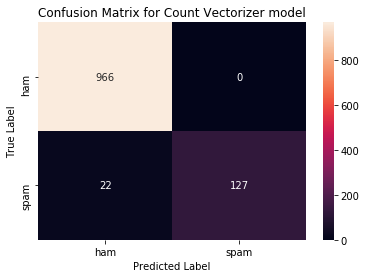

In [45]:
rf = RandomForestClassifier(n_estimators=300, max_depth=90, n_jobs=-1)

rf_cv = rf.fit(X_train, y_train)

y_pred = rf_cv.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))


# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix for Count Vectorizer model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### For TF-IDFVectorizer

In [38]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_tfidf_feat, data['label'])

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nirmala Patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nirmala Patel\Anaconda

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,49.031429,0.380914,0.455482,0.049246,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977578,0.975785,0.974865,...,0.973798,0.002980,1,0.999327,0.999103,0.998878,0.999551,0.998878,0.999148,0.000262
7,25.760606,0.431351,0.303626,0.030421,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.978475,0.975785,0.973070,...,0.973439,0.003349,2,0.998878,0.999327,0.998654,0.999327,0.999327,0.999103,0.000284
6,3.844095,0.282093,0.160465,0.018732,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.970404,0.979372,0.975763,...,0.973259,0.003743,3,0.997532,0.997756,0.998654,0.997084,0.998878,0.997981,0.000680
11,41.423028,0.634653,0.302734,0.030168,None,300,"{'max_depth': None, 'n_estimators': 300}",0.976682,0.973094,0.974865,...,0.973080,0.003009,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10,26.452103,1.699623,0.317937,0.063768,None,150,"{'max_depth': None, 'n_estimators': 150}",0.975785,0.977578,0.973070,...,0.972900,0.003749,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Similarly, the mean_test_score for ***n_estimators = 300*** and ***max_depth = 90*** gives the best result of ***97.7578%***.

In [50]:
X_tfidf_feat.shape

(5572, 8111)

In [51]:
data['label'].shape

(5572,)

#### Split into train/test

In [52]:
from sklearn.model_selection import train_test_split

X = X_tfidf_feat
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Final evaluation of TF-IDFVectorizer model

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

Precision: 1.0 / Recall: 0.846 / F1-Score: 0.916 / Accuracy: 0.979


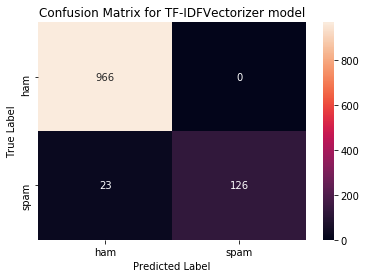

In [54]:
rf = RandomForestClassifier(n_estimators=300, max_depth=90, n_jobs=-1)

rf_tdidf = rf.fit(X_train, y_train)

y_pred = rf_tdidf.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix for TF-IDFVectorizer model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Using ***Random Forest*** for ***TF-IDFVectorizer model*** gives us the following values of metrics:

***Precision: 1.0 / Recall: 0.846 / F1-Score: 0.916 / Accuracy: 0.979***

Confusion Matrix for ***TF-IDFVectorizer model*** tells us that we correctly predicted 966 hams and 126 spams.0 hams were incorrectly identified as spams and 23 spams were incorrectly predicted as hams.

Using ***Random Forest*** for ***Count Vectorizer Model*** gives us the following values of metrics:

***Precision: 1.0 / Recall: 0.852 / F1-Score: 0.92 / Accuracy: 0.98***

Confusion Matrix for ***Count Vectorizer Model*** tells us that we correctly predicted 966 hams and 127 spams.0 hams were incorrectly identified as spams and 22 spams were incorrectly predicted as hams.